In [1]:
#Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Reading data
data = pd.read_csv("attacks.csv", encoding="latin1")

#Cleaning data
data["Country"] = data["Country"].str.capitalize()
data["Country"] = data["Country"].replace({"Usa":"United States", "South africa":"South Africa", "New zealand":"New Zealand", "New caledonia":"New Caledonia"})

data["Fatal (Y/N)"] = data["Fatal (Y/N)"].replace({"Y":"Fatal", "N":"Nonfatal"})

data["Age"] = data["Age"].replace({"20s":"25", "30s":"35", "teen": "15", "Teen": "15", "mid-30s":"35", "21 or 26":"24", "60's":"65", "60s":"65", "12 or 13":"12", "50s":"55", "9 & 12":"9", "Elderly": "12", "6½":"6"})

#General filter
filt_gen = ((data["Type"]=="Unprovoked") & (data["Year"]>=1967.0) & (data["Year"]<2018))
data = data.loc[filt_gen]

#US Specific filter
filt_usa = (data["Country"]=="United States")
usa_data = data.loc[filt_usa]

#Matplotlib modifications
plt.style.use("seaborn-bright")
plt.rc("axes", axisbelow=True)

#List Of Sharks
sharkname = ["Great White Shark", "Tiger Shark", "Bull Shark"]

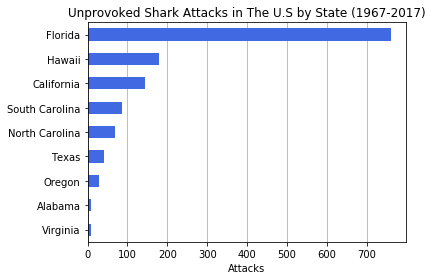

In [3]:
#Graphing Attacks by State
num_attacks_state = usa_data["Area"].value_counts().nlargest(9)
num_attacks_state.sort_values(ascending=True, inplace=True)
num_attacks_state.plot.barh(color="royalblue")

plt.title("Unprovoked Shark Attacks in The U.S by State (1967-2017)")
plt.xlabel("Attacks")

plt.grid(axis="x")
plt.tight_layout()
plt.savefig("AttacksByState.png")

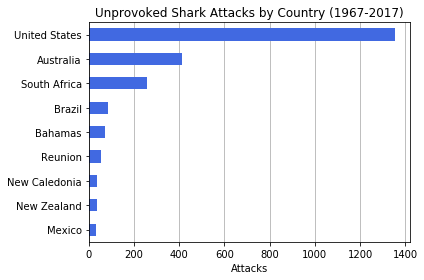

In [4]:
#Graphing Attacks by Country
num_attacks_country = data["Country"].value_counts().nlargest(9)
num_attacks_country.sort_values(ascending=True, inplace=True)
num_attacks_country.plot.barh(color="royalblue")

plt.title("Unprovoked Shark Attacks by Country (1967-2017)")
plt.xlabel("Attacks")

plt.grid(axis="x")
plt.tight_layout()
plt.savefig("AttacksByCountry.png")

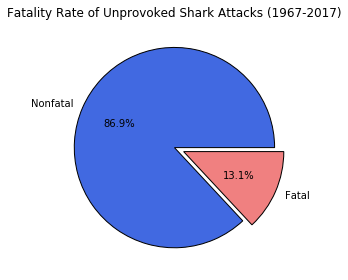

In [5]:
#Graphing Attacks by Fatality Rate
colors = ["royalblue","lightcoral"]
labels = ["Nonfatal", "Fatal"]
explode = [0, 0.1]

slices = data["Fatal (Y/N)"].value_counts().nlargest(2)

plt.pie(slices, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", wedgeprops={"edgecolor":"black"})
plt.title("Fatality Rate of Unprovoked Shark Attacks (1967-2017)")

plt.tight_layout()
plt.savefig("AttacksFatalityRate.png")

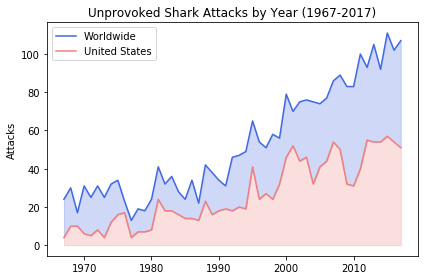

In [6]:
#Graphing Attacks by Year
world_attacks_year = data["Year"].value_counts()
world_attacks_year.sort_index(ascending=True, inplace=True)
world_attacks_year.plot(color="royalblue", label="Worldwide")

usa_attacks_year = usa_data["Year"].value_counts()
usa_attacks_year.sort_index(ascending=True, inplace=True)
usa_attacks_year.plot(color="lightcoral", label ="United States")

plt.title("Unprovoked Shark Attacks by Year (1967-2017)")
plt.ylabel("Attacks")

x_years = data["Year"].value_counts().sort_index().index

plt.fill_between(x_years, usa_attacks_year, world_attacks_year, color="royalblue", alpha=0.25)
plt.fill_between(x_years, usa_attacks_year, color="lightcoral", alpha=0.25)

plt.legend()
plt.tight_layout()
plt.savefig("AttacksByYear.png")

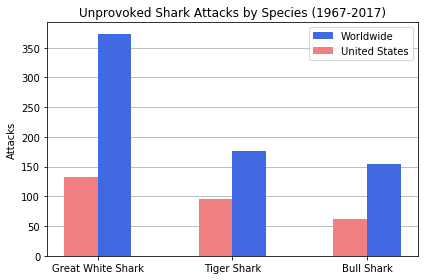

In [7]:
#Graphing Attacks By Species
width = 0.25
xval = np.arange(len(sharkname))

world_gws_counts = data["Species "].str.contains("White shark|white shark").sum()
world_ts_counts = data["Species "].str.contains("Tiger|tiger").sum()
world_bs_counts = data["Species "].str.contains("Bull|bull|Zambesi|zambesi").sum()

world_all_counts = [world_gws_counts, world_ts_counts, world_bs_counts]
plt.bar(xval+(width/2), world_all_counts, label="Worldwide", width=width, color="royalblue")

usa_gws_counts = usa_data["Species "].str.contains("White shark|white shark").sum()
usa_ts_counts = usa_data["Species "].str.contains("Tiger|tiger").sum()
usa_bs_counts = usa_data["Species "].str.contains("Bull|bull|Zambesi|zambesi").sum()

usa_all_counts = [usa_gws_counts, usa_ts_counts, usa_bs_counts]
plt.bar(xval-(width/2), usa_all_counts, label="United States", width=width, color="lightcoral")

plt.xticks(ticks=xval, labels=sharkname)

plt.title("Unprovoked Shark Attacks by Species (1967-2017)")
plt.ylabel("Attacks")

plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("AttacksBySpecies.png")

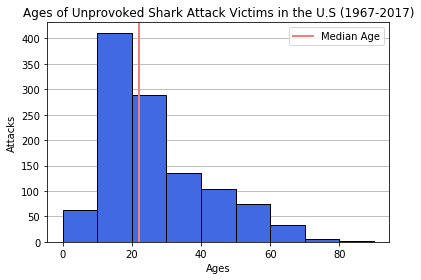

In [8]:
#Graphing Attacks By Age

ages = usa_data["Age"].astype(float)

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.hist(ages, bins=bins, edgecolor = "black", color="royalblue")

median = ages.median()
plt.axvline(median, color="lightcoral", label = "Median Age", linewidth=2)


plt.title("Ages of Unprovoked Shark Attack Victims in the U.S (1967-2017)")
plt.ylabel("Attacks")
plt.xlabel("Ages")

plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("AttacksByAge.png")

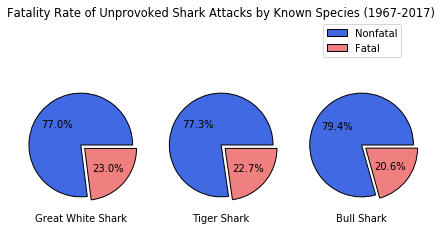

In [9]:
#Graphing Fatality By Species

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

colors = ["royalblue","lightcoral"]
labels = ["Nonfatal", "Fatal"]
explode = [0, 0.1]

fatal_gws = ((data["Species "].str.contains("White shark|white shark")) & (data["Fatal (Y/N)"] == "Fatal")).sum()
nonfatal_gws = ((data["Species "].str.contains("White shark|white shark")) & (data["Fatal (Y/N)"] != "Fatal")).sum()

fatal_ts = ((data["Species "].str.contains("Tiger|tiger")) & (data["Fatal (Y/N)"] == "Fatal")).sum()
nonfatal_ts = ((data["Species "].str.contains("Tiger|tiger")) & (data["Fatal (Y/N)"] != "Fatal")).sum()

fatal_bs = ((data["Species "].str.contains("Bull|bull|Zambesi|zambesi")) & (data["Fatal (Y/N)"] == "Fatal")).sum()
nonfatal_bs = ((data["Species "].str.contains("Bull|bull|Zambesi|zambesi")) & (data["Fatal (Y/N)"] != "Fatal")).sum()

gws = [nonfatal_gws, fatal_gws]
ts = [nonfatal_ts, fatal_ts]
bs = [nonfatal_bs, fatal_bs]

ax1.pie(gws, colors=colors, explode=explode, autopct="%1.1f%%", wedgeprops={"edgecolor":"black"})
ax2.pie(ts, colors=colors, explode=explode, autopct="%1.1f%%", wedgeprops={"edgecolor":"black"})
ax3.pie(bs, colors=colors, explode=explode, autopct="%1.1f%%", wedgeprops={"edgecolor":"black"})

fig.suptitle("Fatality Rate of Unprovoked Shark Attacks by Known Species (1967-2017)", fontsize=11.5)
ax1.set_xlabel("Great White Shark")
ax2.set_xlabel("Tiger Shark")
ax3.set_xlabel("Bull Shark")

fig.legend(labels=labels, loc=(0.73, 0.75))
fig.tight_layout()
plt.savefig("FatalityBySpecies.png")